# Import essential library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#Data loading
train_data = pd.read_csv('/kaggle/input/sfb-training-test/training_set.csv')
test_data = pd.read_csv('/kaggle/input/sfb-training-test/testing_set.csv')

In [3]:
#Check data

train_data.head()

,Day,Month,Year,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,Salinity
0,2006,11,2006,0.033225,0.033225,0.033225,0.033225,0.033225,0.045671,0.033225,27.55
1,2011,10,2011,0.000000,0.000000,0.000000,0.000000,0.000000,0.006454,0.000000,27.69
2,2014,6,2014,0.014285,0.014285,0.014285,0.014285,0.014285,0.015042,0.014285,30.91
3,2015,3,2015,0.011038,0.083436,0.011038,0.011038,0.038958,0.094582,0.011038,27.86
4,2012,12,2012,0.008225,0.014826,0.012445,0.008225,0.014068,0.039608,0.008225,28.40


In [4]:
train_data.shape

(5451, 11)

In [5]:
#Check data

test_data.head()

,Day,Month,Year,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,Salinity
0,2007,10,2007,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,31.57
1,2010,10,2010,0.025649,0.025649,0.025649,0.025649,0.025649,0.072186,0.025649,29.53
2,2003,4,2003,0.084301,0.084301,0.084301,0.084301,0.084301,0.207236,0.084301,27.36
3,2009,6,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.025172,0.000000,28.74
4,2010,10,2010,0.000000,0.013311,0.000000,0.000000,0.000000,0.082570,0.000000,30.75


In [6]:
test_data.shape

(1363, 11)

# Model Development

In [7]:
target = 'Salinity'
feature = ['Day','Month', 'Year', 'MODIS_B02', 'MODIS_B06','MODIS_B05','MODIS_B01','MODIS_B07']
#Establish X_train, y_train, X_test, y_test
X_train = train_data[feature]  
y_train = train_data[target]  
X_test = test_data[feature] 
y_test = test_data[target] 

In [8]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [900,1000],
    'max_depth': [10,11],
    'min_samples_split': [30,40],
    'min_samples_leaf': [5,6,7],
    'bootstrap': [True, False]
}

In [9]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [10]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 11],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [30, 40],
                         'n_estimators': [900, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'bootstrap': True, 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 1000}


In [12]:
# Get the best estimator
best_rf = grid_search.best_estimator_

In [13]:
# Make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [14]:
# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if not np.any(y_true == 0) else np.nan
    return rmse, mae, r2, mape

In [15]:
# Calculate metrics for training and testing sets
train_rmse, train_mae, train_r2, train_mape = calculate_metrics(y_train, y_train_pred)
test_rmse, test_mae, test_r2, test_mape = calculate_metrics(y_test, y_test_pred)

In [16]:
# Print the evaluation metrics
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse}")
print(f"  MAE: {train_mae}")
print(f"  R-squared: {train_r2}")
print(f"  MAPE: {train_mape:.2f}%")

print("\nTesting Metrics:")
print(f"  RMSE: {test_rmse}")
print(f"  MAE: {test_mae}")
print(f"  R-squared: {test_r2}")
print(f"  MAPE: {test_mape:.2f}%")


Training Metrics:
  RMSE: 1.827923764849946
  MAE: 1.212979334585162
  R-squared: 0.779231377757879
  MAPE: 4.98%

Testing Metrics:
  RMSE: 1.983823395728208
  MAE: 1.3214364402523608
  R-squared: 0.7431761126603376
  MAPE: 5.34%


     Feature  Importance
1      Month    0.458010
2       Year    0.216314
0        Day    0.215033
4  MODIS_B06    0.041861
3  MODIS_B02    0.031189
5  MODIS_B05    0.014221
6  MODIS_B01    0.011755
7  MODIS_B07    0.011618


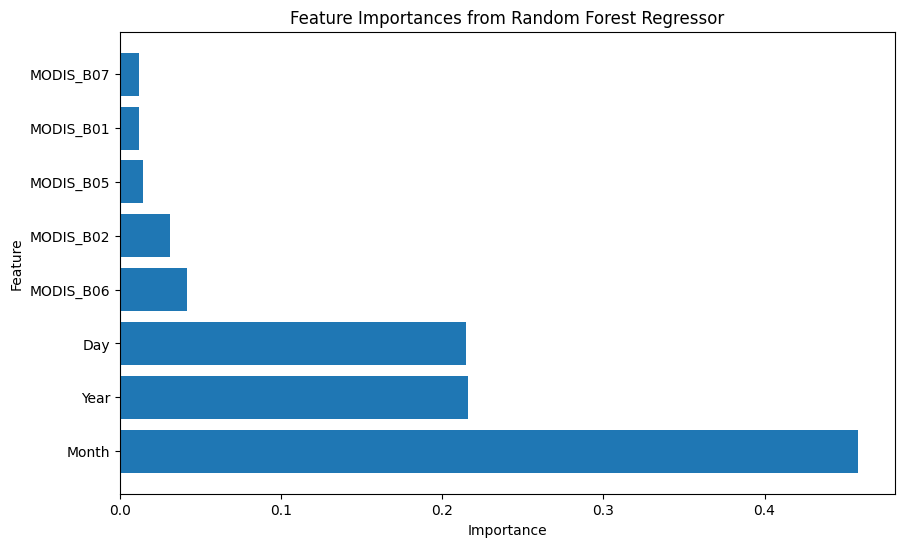

In [17]:
# Get feature importances from the trained RandomForestRegressor model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()